In [156]:
import pandas as pd
import seaborn as sb
import geonamescache
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install geonamescache
data_frame = pd.read_csv('master.csv')
data_frame.to_csv('copy_of_' + 'file.csv')
data_frame


country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27820 rows x 12 columns]

In [157]:
#data_frame.tail(10)
#data_frame = data_frame[data_frame["country"]=="pakistan"]
#data_frame

In [158]:
data_frame.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [159]:
data_frame.shape

(27820, 12)

In [160]:
data_frame.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [161]:
data_frame = pd.read_csv("master.csv", index_col = "country")
data_frame.head(20)

year     sex          age  suicides_no  population  \
country                                                       
Albania  1987    male  15-24 years           21      312900   
Albania  1987    male  35-54 years           16      308000   
Albania  1987  female  15-24 years           14      289700   
Albania  1987    male    75+ years            1       21800   
Albania  1987    male  25-34 years            9      274300   
Albania  1987  female    75+ years            1       35600   
Albania  1987  female  35-54 years            6      278800   
Albania  1987  female  25-34 years            4      257200   
Albania  1987    male  55-74 years            1      137500   
Albania  1987  female   5-14 years            0      311000   
Albania  1987  female  55-74 years            0      144600   
Albania  1987    male   5-14 years            0      338200   
Albania  1988  female    75+ years            2       36400   
Albania  1988    male  15-24 years           17      319200   
Albania  1988    male    75+ years            1       22300   
Albania  1988    male  35-54 years           14      314100   
Albania  1988    male  55-74 years            4      140200   
Albania  1988  female  15-24 years            8      295600   
Albania  1988  female  55-74 years            3      147500   
Albania  1988  female  25-34 years            5      262400   

         suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
country                                                                    
Albania               6.71  Albania1987           NaN      2,156,624,900   
Albania               5.19  Albania1987           NaN      2,156,624,900   
Albania               4.83  Albania1987           NaN      2,156,624,900   
Albania               4.59  Albania1987           NaN      2,156,624,900   
Albania               3.28  Albania1987           NaN      2,156,624,900   
Albania               2.81  Albania1987           NaN      2,156,624,900   
Albania               2.15  Albania1987           NaN      2,156,624,900   
Albania               1.56  Albania1987           NaN      2,156,624,900   
Albania               0.73  Albania1987           NaN      2,156,624,900   
Albania               0.00  Albania1987           NaN      2,156,624,900   
Albania               0.00  Albania1987           NaN      2,156,624,900   
Albania               0.00  Albania1987           NaN      2,156,624,900   
Albania               5.49  Albania1988           NaN      2,126,000,000   
Albania               5.33  Albania1988           NaN      2,126,000,000   
Albania               4.48  Albania1988           NaN      2,126,000,000   
Albania               4.46  Albania1988           NaN      2,126,000,000   
Albania               2.85  Albania1988           NaN      2,126,000,000   
Albania               2.71  Albania1988           NaN      2,126,000,000   
Albania               2.03  Albania1988           NaN      2,126,000,000   
Albania               1.91  Albania1988           NaN      2,126,000,000   

         gdp_per_capita ($)       generation  
country                                       
Albania                 796     Generation X  
Albania                 796           Silent  
Albania                 796     Generation X  
Albania                 796  G.I. Generation  
Albania                 796          Boomers  
Albania                 796  G.I. Generation  
Albania                 796           Silent  
Albania                 796          Boomers  
Albania                 796  G.I. Generation  
Albania                 796     Generation X  
Albania                 796  G.I. Generation  
Albania                 796     Generation X  
Albania                 769  G.I. Generation  
Albania                 769     Generation X  
Albania                 769  G.I. Generation  
Albania                 769           Silent  
Albania                 769  G.I. Generation  
Albania                 769     Generation X  
Albania  

In [162]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                27820 non-null  int64  
 1   sex                 27820 non-null  object 
 2   age                 27820 non-null  object 
 3   suicides_no         27820 non-null  int64  
 4   population          27820 non-null  int64  
 5   suicides/100k pop   27820 non-null  float64
 6   country-year        27820 non-null  object 
 7   HDI for year        8364 non-null   float64
 8    gdp_for_year ($)   27820 non-null  object 
 9   gdp_per_capita ($)  27820 non-null  int64  
 10  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 2.5+ MB


In [163]:
pd.isnull(data_frame).sum()

year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [164]:
data_frame.isnull().sum()

year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [165]:
#unusefull data like which not available in the column of HDI for year, thats why its removed
data_frame = data_frame.drop(columns = 'HDI for year')
#Dropping Country year which isn't useful because Country and year specifically defined column wise.
data_frame = data_frame.drop(columns = 'country-year')

In [166]:
data_frame

year     sex          age  suicides_no  population  \
country                                                          
Albania     1987    male  15-24 years           21      312900   
Albania     1987    male  35-54 years           16      308000   
Albania     1987  female  15-24 years           14      289700   
Albania     1987    male    75+ years            1       21800   
Albania     1987    male  25-34 years            9      274300   
...          ...     ...          ...          ...         ...   
Uzbekistan  2014  female  35-54 years          107     3620833   
Uzbekistan  2014  female    75+ years            9      348465   
Uzbekistan  2014    male   5-14 years           60     2762158   
Uzbekistan  2014  female   5-14 years           44     2631600   
Uzbekistan  2014  female  55-74 years           21     1438935   

            suicides/100k pop  gdp_for_year ($)   gdp_per_capita ($)  \
country                                                                
Albania                  6.71      2,156,624,900                 796   
Albania                  5.19      2,156,624,900                 796   
Albania                  4.83      2,156,624,900                 796   
Albania                  4.59      2,156,624,900                 796   
Albania                  3.28      2,156,624,900                 796   
...                       ...                ...                 ...   
Uzbekistan               2.96     63,067,077,179                2309   
Uzbekistan               2.58     63,067,077,179                2309   
Uzbekistan               2.17     63,067,077,179                2309   
Uzbekistan               1.67     63,067,077,179                2309   
Uzbekistan               1.46     63,067,077,179                2309   

                 generation  
country                      
Albania        Generation X  
Albania              Silent  
Albania        Generation X  
Albania     G.I. Generation  
Albania             Boomers  
...                     ...  
Uzbekistan     Generation X  
Uzbekistan           Silent  
Uzbekistan     Generation Z  
Uzbekistan     Generation Z  
Uzbekistan          Boomers  

[27820 rows x 9 columns]

In [167]:
data_frame.rename(columns={'HDI for year': 'HDI_for_year', 'country-year':'country_year', 
                   'suicides/100k pop': 'suicides/100k_pop', ' gdp_for_year ($) ':'gdp_for_year', 
                   'gdp_per_capita ($)':'gdp_per_capita', 'suicides_no': 'Total Sucides'}, inplace=True);
data_frame.head()

year     sex          age  Total Sucides  population  \
country                                                         
Albania  1987    male  15-24 years             21      312900   
Albania  1987    male  35-54 years             16      308000   
Albania  1987  female  15-24 years             14      289700   
Albania  1987    male    75+ years              1       21800   
Albania  1987    male  25-34 years              9      274300   

         suicides/100k_pop   gdp_for_year  gdp_per_capita       generation  
country                                                                     
Albania               6.71  2,156,624,900             796     Generation X  
Albania               5.19  2,156,624,900             796           Silent  
Albania               4.83  2,156,624,900             796     Generation X  
Albania               4.59  2,156,624,900             796  G.I. Generation  
Albania               3.28  2,156,624,900             796          Boomers

In [168]:
data_frame.dropna(1, inplace=True);
data_frame

year     sex          age  Total Sucides  population  \
country                                                            
Albania     1987    male  15-24 years             21      312900   
Albania     1987    male  35-54 years             16      308000   
Albania     1987  female  15-24 years             14      289700   
Albania     1987    male    75+ years              1       21800   
Albania     1987    male  25-34 years              9      274300   
...          ...     ...          ...            ...         ...   
Uzbekistan  2014  female  35-54 years            107     3620833   
Uzbekistan  2014  female    75+ years              9      348465   
Uzbekistan  2014    male   5-14 years             60     2762158   
Uzbekistan  2014  female   5-14 years             44     2631600   
Uzbekistan  2014  female  55-74 years             21     1438935   

            suicides/100k_pop    gdp_for_year  gdp_per_capita       generation  
country                                                                         
Albania                  6.71   2,156,624,900             796     Generation X  
Albania                  5.19   2,156,624,900             796           Silent  
Albania                  4.83   2,156,624,900             796     Generation X  
Albania                  4.59   2,156,624,900             796  G.I. Generation  
Albania                  3.28   2,156,624,900             796          Boomers  
...                       ...             ...             ...              ...  
Uzbekistan               2.96  63,067,077,179            2309     Generation X  
Uzbekistan               2.58  63,067,077,179            2309           Silent  
Uzbekistan               2.17  63,067,077,179            2309     Generation Z  
Uzbekistan               1.67  63,067,077,179            2309     Generation Z  
Uzbekistan               1.46  63,067,077,179            2309          Boomers  

[27820 rows x 9 columns]

In [169]:
print("Min : ",data_frame.year.min())
print("Max : ",data_frame.year.max())


Min :  1985
Max :  2016


In [170]:
#removed years with age which was basically garbage
data_frame['age'] = data_frame['age'].str.rstrip(' years')


In [171]:
#type of GDP for year needs to be change in int64
data_frame = data_frame.fillna(7)
data_frame['gdp_for_year'] = data_frame['gdp_for_year'].str.replace(",", "")
data_frame['gdp_for_year'] = data_frame['gdp_for_year'].astype('int64')

In [172]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27820 entries, Albania to Uzbekistan
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               27820 non-null  int64  
 1   sex                27820 non-null  object 
 2   age                27820 non-null  object 
 3   Total Sucides      27820 non-null  int64  
 4   population         27820 non-null  int64  
 5   suicides/100k_pop  27820 non-null  float64
 6   gdp_for_year       27820 non-null  int64  
 7   gdp_per_capita     27820 non-null  int64  
 8   generation         27820 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.1+ MB


In [173]:
data_frame[["age","sex","generation"]] = data_frame[["age","sex","generation"]].astype("category")
data_frame

year     sex    age  Total Sucides  population  suicides/100k_pop  \
country                                                                         
Albania     1987    male  15-24             21      312900               6.71   
Albania     1987    male  35-54             16      308000               5.19   
Albania     1987  female  15-24             14      289700               4.83   
Albania     1987    male    75+              1       21800               4.59   
Albania     1987    male  25-34              9      274300               3.28   
...          ...     ...    ...            ...         ...                ...   
Uzbekistan  2014  female  35-54            107     3620833               2.96   
Uzbekistan  2014  female    75+              9      348465               2.58   
Uzbekistan  2014    male   5-14             60     2762158               2.17   
Uzbekistan  2014  female   5-14             44     2631600               1.67   
Uzbekistan  2014  female  55-74             21     1438935               1.46   

            gdp_for_year  gdp_per_capita       generation  
country                                                    
Albania       2156624900             796     Generation X  
Albania       2156624900             796           Silent  
Albania       2156624900             796     Generation X  
Albania       2156624900             796  G.I. Generation  
Albania       2156624900             796          Boomers  
...                  ...             ...              ...  
Uzbekistan   63067077179            2309     Generation X  
Uzbekistan   63067077179            2309           Silent  
Uzbekistan   63067077179            2309     Generation Z  
Uzbekistan   63067077179            2309     Generation Z  
Uzbekistan   63067077179            2309          Boomers  

[27820 rows x 9 columns]

In [174]:
yearCountry = data_frame.groupby('country')['year'].nunique().reset_index()
countries = list(yearCountry[yearCountry['year']>=10]['country'])
countries

['Albania',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Brazil',
 'Bulgaria',
 'Canada',
 'Chile',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Ecuador',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Maldives',
 'Malta',
 'Mauritius',
 'Mexico',
 'Montenegro',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Panama',
 'Paraguay',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Korea',
 'Romania',
 'Russian Federation',
 'Saint Lucia',
 'Saint Vincent and Grenadines',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Slovakia',
 'Slove

In [175]:
#The complete data is extracted from geonames cache to mapping
geocache = geonamescache.GeonamesCache()
countries = geocache.get_countries()
countries

{'AD': {'geonameid': 3041565,
  'name': 'Andorra',
  'iso': 'AD',
  'iso3': 'AND',
  'isonumeric': 20,
  'fips': 'AN',
  'continentcode': 'EU',
  'capital': 'Andorra la Vella',
  'areakm2': 468,
  'population': 84000,
  'tld': '.ad',
  'currencycode': 'EUR',
  'currencyname': 'Euro',
  'phone': '376',
  'postalcoderegex': '^(?:AD)*(\\d{3})$',
  'languages': 'ca',
  'neighbours': 'ES,FR'},
 'AE': {'geonameid': 290557,
  'name': 'United Arab Emirates',
  'iso': 'AE',
  'iso3': 'ARE',
  'isonumeric': 784,
  'fips': 'AE',
  'continentcode': 'AS',
  'capital': 'Abu Dhabi',
  'areakm2': 82880,
  'population': 4975593,
  'tld': '.ae',
  'currencycode': 'AED',
  'currencyname': 'Dirham',
  'phone': '971',
  'postalcoderegex': '',
  'languages': 'ar-AE,fa,en,hi,ur',
  'neighbours': 'SA,OM'},
 'AF': {'geonameid': 1149361,
  'name': 'Afghanistan',
  'iso': 'AF',
  'iso3': 'AFG',
  'isonumeric': 4,
  'fips': 'AF',
  'continentcode': 'AS',
  'capital': 'Kabul',
  'areakm2': 647500,
  'population': 

In [114]:
#Adding continents which extracted from git
maps = pd.DataFrame(countries).T.reset_index()[['name','continentcode']]
maps.rename(columns = {'name':'country'}, inplace=True)
maps

country continentcode
0                  Andorra            EU
1     United Arab Emirates            AS
2              Afghanistan            AS
3      Antigua and Barbuda            NA
4                 Anguilla            NA
..                     ...           ...
247           South Africa            AF
248                 Zambia            AF
249               Zimbabwe            AF
250  Serbia and Montenegro            EU
251   Netherlands Antilles            NA

[252 rows x 2 columns]

In [115]:
#Renaming some Countries names
maps.rename(columns = {'name':'country'}, inplace=True)
maps['country'] = maps['country'].replace({'Macao':'Macau',
                                   'Czechia':'Czech Republic',
                                   'South Korea':'Republic of Korea',
                                   'Russia':'Russian Federation',
                                   'Saint Vincent and the Grenadines':'Saint Vincent and Grenadines'})

In [116]:
maps

country continentcode
0                  Andorra            EU
1     United Arab Emirates            AS
2              Afghanistan            AS
3      Antigua and Barbuda            NA
4                 Anguilla            NA
..                     ...           ...
247           South Africa            AF
248                 Zambia            AF
249               Zimbabwe            AF
250  Serbia and Montenegro            EU
251   Netherlands Antilles            NA

[252 rows x 2 columns]

In [117]:
#Renaming Continent code to full name
data_frame = pd.merge(data_frame,maps,on='country', how = 'left')
data_frame['continentcode'] = data_frame['continentcode'].replace({
                                    'NA':'North America',
                                   'SA':'South America',
                                    'EU':'Europe',
                                   'AS':'Asia',
                                   'AF':'Africa',
                                   'OC':'Oceania'})

In [118]:
data_frame

country  year     sex    age  Total Sucides  population  \
0         Albania  1987    male  15-24             21      312900   
1         Albania  1987    male  35-54             16      308000   
2         Albania  1987  female  15-24             14      289700   
3         Albania  1987    male    75+              1       21800   
4         Albania  1987    male  25-34              9      274300   
...           ...   ...     ...    ...            ...         ...   
27815  Uzbekistan  2014  female  35-54            107     3620833   
27816  Uzbekistan  2014  female    75+              9      348465   
27817  Uzbekistan  2014    male   5-14             60     2762158   
27818  Uzbekistan  2014  female   5-14             44     2631600   
27819  Uzbekistan  2014  female  55-74             21     1438935   

       suicides/100k_pop  gdp_for_year  gdp_per_capita       generation  \
0                   6.71    2156624900             796     Generation X   
1                   5.19    2156624900             796           Silent   
2                   4.83    2156624900             796     Generation X   
3                   4.59    2156624900             796  G.I. Generation   
4                   3.28    2156624900             796          Boomers   
...                  ...           ...             ...              ...   
27815               2.96   63067077179            2309     Generation X   
27816               2.58   63067077179            2309           Silent   
27817               2.17   63067077179            2309     Generation Z   
27818               1.67   63067077179            2309     Generation Z   
27819               1.46   63067077179            2309          Boomers   

      continentcode  
0            Europe  
1            Europe  
2            Europe  
3            Europe  
4            Europe  
...             ...  
27815          Asia  
27816          Asia  
27817          Asia  
27818          Asia  
27819          Asia  

[27820 rows x 11 columns]

In [176]:
data_frame.pivot_table(values = 'Total Sucides',columns = 'year',index = 'country',aggfunc='sum').isnull().sum()

year
1985    53
1986    53
1987    47
1988    52
1989    49
1990    37
1991    37
1992    36
1993    36
1994    33
1995    23
1996    24
1997    24
1998    22
1999    18
2000    15
2001    13
2002    15
2003    15
2004    17
2005    17
2006    16
2007    15
2008    16
2009    12
2010    13
2011    15
2012    20
2013    21
2014    23
2015    39
2016    85
dtype: int64

In [120]:
#the observation is much less of data 2016 so thats why it has to be remove
data_frame = data_frame[data_frame["year"] != 2016]

In [121]:
#Checking Outliers on Dataset Column of Total sucides

#y = sorted(data_frame['total_sucides'])
#q1,q3 = np.percentile(y,[25,75])
#iqr = q3-q1
#lb = q1 - (iqr*1.5)
#ub = q3 + (iqr*1.5)
#out_l_ub= sorted(data_frame.total_sucides[data_frame['total_sucides']>ub])
#out_l_lb = sorted(data_frame.total_sucides[data_frame['total_sucides']<lb])
#out_l_ub
#data_frame

In [122]:
data_frame.rename(columns={'Total Sucides':'total_sucides',
                          'continentcode':'continent'
                          }, 
                 inplace=True)
data_frame
 

C:\Users\yasin\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


country  year     sex    age  total_sucides  population  \
0         Albania  1987    male  15-24             21      312900   
1         Albania  1987    male  35-54             16      308000   
2         Albania  1987  female  15-24             14      289700   
3         Albania  1987    male    75+              1       21800   
4         Albania  1987    male  25-34              9      274300   
...           ...   ...     ...    ...            ...         ...   
27815  Uzbekistan  2014  female  35-54            107     3620833   
27816  Uzbekistan  2014  female    75+              9      348465   
27817  Uzbekistan  2014    male   5-14             60     2762158   
27818  Uzbekistan  2014  female   5-14             44     2631600   
27819  Uzbekistan  2014  female  55-74             21     1438935   

       suicides/100k_pop  gdp_for_year  gdp_per_capita       generation  \
0                   6.71    2156624900             796     Generation X   
1                   5.19    2156624900             796           Silent   
2                   4.83    2156624900             796     Generation X   
3                   4.59    2156624900             796  G.I. Generation   
4                   3.28    2156624900             796          Boomers   
...                  ...           ...             ...              ...   
27815               2.96   63067077179            2309     Generation X   
27816               2.58   63067077179            2309           Silent   
27817               2.17   63067077179            2309     Generation Z   
27818               1.67   63067077179            2309     Generation Z   
27819               1.46   63067077179            2309          Boomers   

      continent  
0        Europe  
1        Europe  
2        Europe  
3        Europe  
4        Europe  
...         ...  
27815      Asia  
27816      Asia  
27817      Asia  
27818      Asia  
27819      Asia  

[27660 rows x 11 columns]

In [123]:
#checking the outliers
print("Skew of sucide column:", data_frame['suicides/100k_pop'].skew())

Skew of sucide column: 2.9651695374286198


In [124]:
sb.boxplot(x=data_frame['suicides/100k_pop'])

In [125]:
Q1 = data_frame.quantile(0.15)
Q3 = data_frame.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

year                 2.000000e+01
total_sucides        2.960000e+02
population           3.552347e+06
suicides/100k_pop    2.548000e+01
gdp_for_year         5.276543e+11
gdp_per_capita       3.203900e+04
dtype: float64


In [126]:
#this will remove outliers but didn't use it because without removing outliers visualisation is exact
#data_out = data_frame[~((data_frame < (Q1 - 1.5 * IQR)) |(data_frame > (Q3 + 1.5 * IQR))).any(axis=1)]
#data_out.shape
low_bound = 0.1
up_bound = 0.95
values = data_frame['suicides/100k_pop']
res = values.quantile([low_bound,up_bound])
res

0.10     0.000
0.95    50.542
Name: suicides/100k_pop, dtype: float64

In [127]:
# All are coming true values
t_index = (res.loc[low_bound] < data_frame['suicides/100k_pop'].values) &  (data_frame['suicides/100k_pop'].values < res.loc[up_bound] )
t_index

array([ True,  True,  True, ...,  True,  True,  True])

In [128]:
#Ploting generation wise of attempted sucides
tabgen = data_frame.pivot_table('total_sucides', index='generation', aggfunc='sum')
_axisx = tabgen.index.values
_axisy = tabgen.values
_axisy = _axisy.reshape(6,)

(-1.1811883624073427,
 1.1391969834215876,
 -1.1500226283424158,
 1.1524923692191553)

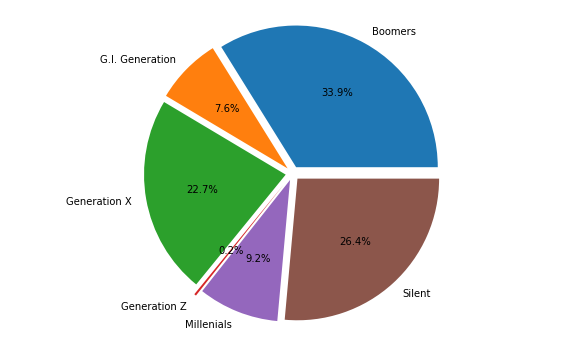

In [129]:
#telling some size info and other 
figure, axis = plt.subplots(figsize=(10, 6))
explode = (0.05,0.05,0.05,0.1,0.05,0.05)
#creating pie chart
axis.pie(_axisy, explode=explode, labels=_axisx, autopct='%1.1f%%', startangle=0)
axis.axis('equal') 

In [1]:
#Now creating chart of the ages with the using of total sucide column
tab_age = data_frame.pivot_table('total_sucides', index='age', aggfunc='sum')
axis_x = tab_age.index.values
axis_y = tab_age.values
#described shaping of it
axis_y = axis_y.reshape(6,)

NameError: name 'data_frame' is not defined

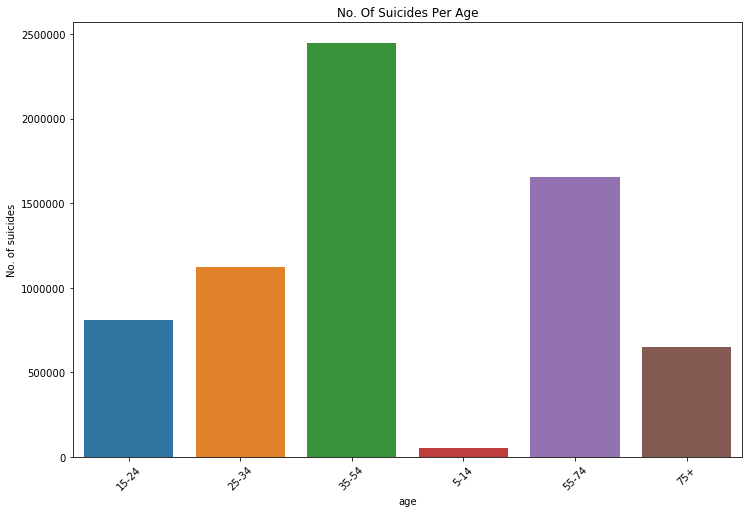

In [131]:
#now bar plotting of this according to ages all sucides
figgg, axiss = plt.subplots(figsize=(12, 8))
sb.barplot(x=axis_x, y=axis_y)
axiss.set(title='No. Of Suicides Per Age', xlabel='age',ylabel='No. of suicides');
plt.xticks(rotation=45);
plt.show()

In [132]:
plt.figure(figsize=(20,8))
sb.barplot(x = "year", y = "suicides/100k_pop", hue = "sex",data = data_frame.groupby(["year","sex"]).sum().reset_index()).set_title("Genders vs Suicides")

Text(0.5,1,'Genders vs Suicides')

In [145]:
countrywise = data_frame.groupby('country').mean().sort_values('suicides/100k_pop', ascending=False).reset_index()

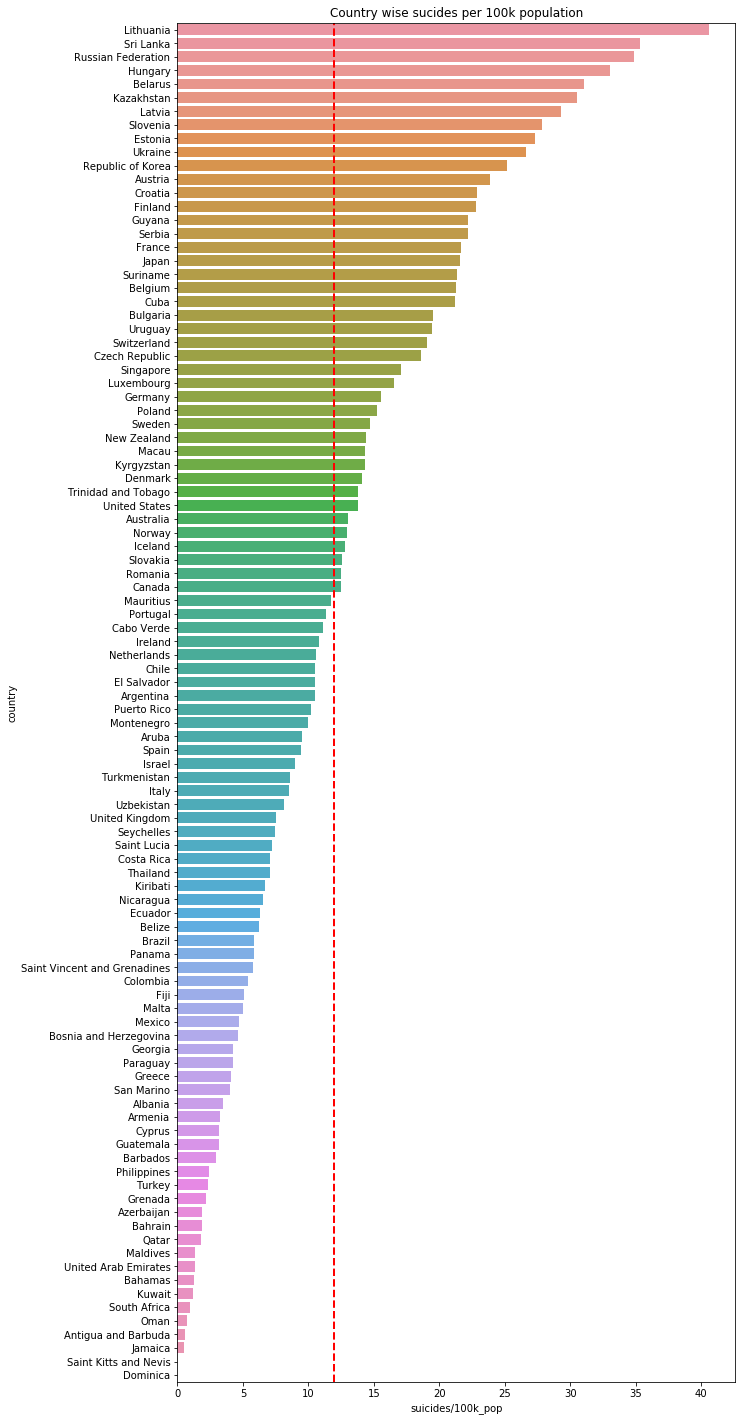

In [149]:
plt.figure(figsize=(10,25))
sb.barplot(x='suicides/100k_pop', y ='country', data=countrywise)
plt.axvline(x = countrywise['suicides/100k_pop'].mean(),color = 'red', ls='--', linewidth=2)
plt.title('Country wise sucides per 100k population')
plt.show()

In [134]:
Sort_country = data_frame.groupby('country').mean().sort_values('suicides/100k_pop', ascending=False).reset_index()

In [138]:
male_population = data_frame.loc[data_frame.loc[:, 'sex']=='male',:]
female_population = data_frame.loc[data_frame.loc[:, 'sex']=='female',:]

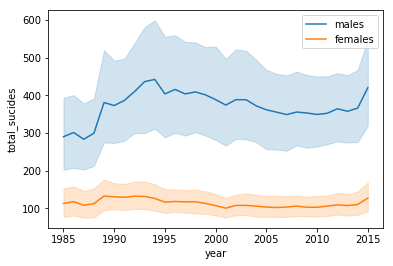

In [143]:
p = sb.lineplot(x='year', y='total_sucides', data=male_population)
q = sb.lineplot(x='year', y='total_sucides', data=female_population)

_ = plt.legend(['males', 'females'])

In [180]:
g = sb.jointplot(x="gdp_per_capita", y="suicides/100k_pop", data=countrywise, kind='regresion', \
              xlim=(-100,80000), ylim=(0,45), color='blue')